<a href="https://colab.research.google.com/github/emiliomercuri/hidrologia/blob/main/notebooks/Separa%C3%A7%C3%A3o_do_Fluxo_de_Base_M%C3%A9todo_de_Hewlett_and_Hibbert_(1967).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Separação do Fluxo de Base

Utilizando o Método de Hewlett and Hibbert (1967)

Um método empírico amplamente utilizado para pequenas bacias foi proposto por Hewlett e Hibbert (1967) que argumentaram que “uma vez que uma separação arbitrária deve ser feita em qualquer caso, por que não basear a classificação em uma única decisão arbitrária, como um método fixo e universal? para separar hidrogramas em todas as pequenas bacias?” Eles separaram o hidrograma em componentes de "fluxo rápido" e "fluxo lento", projetando arbitrariamente uma linha de inclinação constante desde o início de qualquer aumento de vazão até cruzar a curva de recessão do hidrograma.

O aumento constante da vazão é descrito pelas equações:
\begin{equation}
\begin{aligned}
&B_{t}=B_{t-1}+ k \, \Delta t \, A \text { para } Q_{t}>B_{t-1}+k, \\
&B_{t}=Q_{t} \text { para } Q_{t} \leq B_{t-1} + k \, \Delta t \, A.
\end{aligned}
\end{equation}

Sendo que $k$ determina a inclinação da reta ($k = 0,000546$ m$^3$s$^{-1}$km$^{-2}$h$^{-1}$) ponderada pela área da bacia $A$ em km$^2$ e pelo intervalo de tempo $\Delta t$ em horas (Hewlet e Hibbert, 1967).

In [2]:
pip install Hydrograph-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for Hydrograph-py: filename=Hydrograph_py-1.0.1-py3-none-any.whl size=11194 sha256=79b4b566dd6ee73da04a2b7a9ae38fc11e2219091f8ae0225bc9bb2f33e7c088
  Stored in directory: /root/.cache/pip/wheels/ff/70/33/4ed23d69e176ce68881441529983c19136c7da24e117e177ae
Successfully built Hydrograph-py


In [3]:
from Hydrograph.hydrograph import sepBaseflow

In [4]:
import pandas

In [5]:
from urllib.request import urlretrieve
URL = 'https://www.dropbox.com/s/0izm52b1ofqlbn3/vazao%20nhundi%2082170000%20-%20menor.csv?dl=1'
urlretrieve(URL, 'vazao diaria.csv')

('vazao diaria.csv', <http.client.HTTPMessage at 0x7fec22740670>)

In [6]:
mydateparser = lambda x: pandas.datetime.strptime(x, "%d/%m/%Y")
vazao = pandas.read_csv('vazao diaria.csv', index_col= 0, sep =';', date_parser=mydateparser, names=['Date', 'Total runoff [m^3 s^-1]'], header=0)

<ipython-input-6-caa8d0f82400>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  mydateparser = lambda x: pandas.datetime.strptime(x, "%d/%m/%Y")


In [7]:
vazao

,Total runoff [m^3 s^-1]
Date,
1939-01-01,10.56
1939-01-02,8.19
1939-01-03,16.16
1939-01-04,16.69
1939-01-05,15.11
...,...
1939-03-27,17.76
1939-03-28,14.59
1939-03-29,11.05


In [ ]:
sepBaseflow?

## Função sepBaseflow

Nessa função vamos informar 3 argumentos:

1. Dataframe com os dados diários de vazão
2. $\Delta t$ para interpolação dos dados diários em horários ($\Delta t = 60$ min = 1 hora)
3. Área da bacia em km$^2$ 

O algoritmo faz a separação do fluxo de base usando as equações mostradas no início do notebook.

In [8]:
df_final = sepBaseflow(vazao,60,100)

Processing using a 60-minute interval...
1939-01-01 00:00:00
1939-01-01 01:00:00
1939-01-01 02:00:00
1939-01-01 03:00:00
1939-01-01 04:00:00
1939-01-01 05:00:00
1939-01-01 06:00:00
1939-01-01 07:00:00
1939-01-01 08:00:00
1939-01-01 09:00:00
1939-01-01 10:00:00
1939-01-01 11:00:00
1939-01-01 12:00:00
1939-01-01 13:00:00
1939-01-01 14:00:00
1939-01-01 15:00:00
1939-01-01 16:00:00
1939-01-01 17:00:00
1939-01-01 18:00:00
1939-01-01 19:00:00
1939-01-01 20:00:00
1939-01-01 21:00:00
1939-01-01 22:00:00
1939-01-01 23:00:00
1939-01-02 00:00:00
1939-01-02 01:00:00
1939-01-02 02:00:00
1939-01-02 03:00:00
1939-01-02 04:00:00
1939-01-02 05:00:00
1939-01-02 06:00:00
1939-01-02 07:00:00
1939-01-02 08:00:00
1939-01-02 09:00:00
1939-01-02 10:00:00
1939-01-02 11:00:00
1939-01-02 12:00:00
1939-01-02 13:00:00
1939-01-02 14:00:00
1939-01-02 15:00:00
1939-01-02 16:00:00
1939-01-02 17:00:00
1939-01-02 18:00:00
1939-01-02 19:00:00
1939-01-02 20:00:00
1939-01-02 21:00:00
1939-01-02 22:00:00
1939-01-02 23:00:00

In [9]:
df_final

,dt [hour],Total runoff [m^3 s^-1],Total runoff interp. [m^3 s^-1],Baseflow [m^3 s^-1],Peakflow [m^3 s^-1],Peak nr.,Peakflow starts,Peakflow ends,Flow volume [m^3],Max. flow [m^3 s^-1],Date max. flow,Tp [hour]
Date,,,,,,,,,,,,
1939-01-01 00:00:00,0.0,10.56,10.560000,10.56000,0.000000,NaN,NaT,NaT,NaN,NaN,NaT,NaN
1939-01-01 01:00:00,1.0,NaN,10.461250,10.46125,0.000000,NaN,NaT,NaT,NaN,NaN,NaT,NaN
1939-01-01 02:00:00,1.0,NaN,10.362500,10.36250,0.000000,NaN,NaT,NaT,NaN,NaN,NaT,NaN
1939-01-01 03:00:00,1.0,NaN,10.263750,10.26375,0.000000,NaN,NaT,NaT,NaN,NaN,NaT,NaN
1939-01-01 04:00:00,1.0,NaN,10.165000,10.16500,0.000000,NaN,NaT,NaT,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1939-03-30 20:00:00,1.0,NaN,33.671667,13.45240,20.219267,14.0,1939-03-29 01:00:00,1939-03-31,121218.0,36.08,1939-03-30,23.0
1939-03-30 21:00:00,1.0,NaN,33.551250,13.50700,20.044250,14.0,1939-03-29 01:00:00,1939-03-31,120784.5,36.08,1939-03-30,23.0
1939-03-30 22:00:00,1.0,NaN,33.430833,13.56160,19.869233,14.0,1939-03-29 01:00:00,1939-03-31,120351.0,36.08,1939-03-30,23.0


In [10]:
from matplotlib import pyplot as plt
import numpy
import matplotlib.dates as mdates
from datetime import datetime, timedelta

%matplotlib inline  
import warnings
warnings.filterwarnings("ignore")

<Figure size 640x480 with 0 Axes>

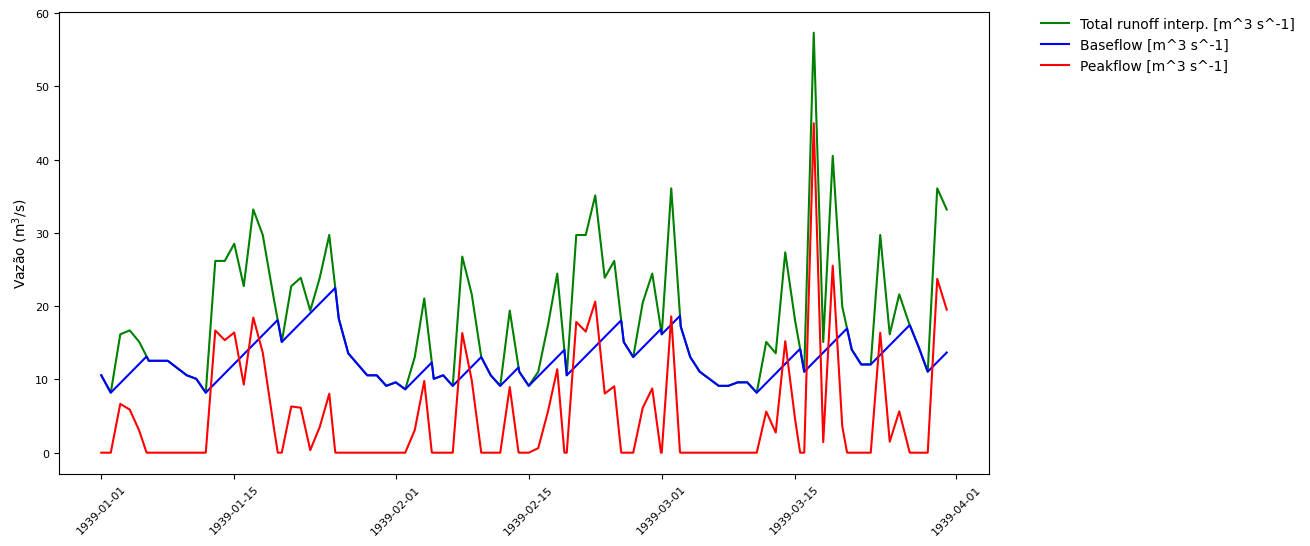

In [11]:
plt.gcf().autofmt_xdate()        
plt.figure(figsize=(12, 6))
#plt.plot(df_final['Total runoff [m^3 s^-1]'],color='green', marker='o', linestyle='dashed',linewidth=1.5, markersize=1.1, label = 'Vazão (m3/s)')
plt.plot(df_final['Total runoff interp. [m^3 s^-1]'],color='green', linewidth=1.5, markersize=1.1, label = 'Total runoff interp. [m^3 s^-1]')
plt.plot(df_final['Baseflow [m^3 s^-1]'],color='blue',linewidth=1.5, markersize=1.1, label = 'Baseflow [m^3 s^-1]')
plt.plot(df_final['Peakflow [m^3 s^-1]'],color='red',linewidth=1.5, markersize=1.1, label = 'Peakflow [m^3 s^-1]')
plt.ylabel(r'Vazão (m$^3$/s)')

plt.tick_params(axis='both', labelsize=8) #increase font size for ticks
plt.xticks(rotation=45)
leg = plt.legend();
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,frameon=False)

plt.show()